   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.3333

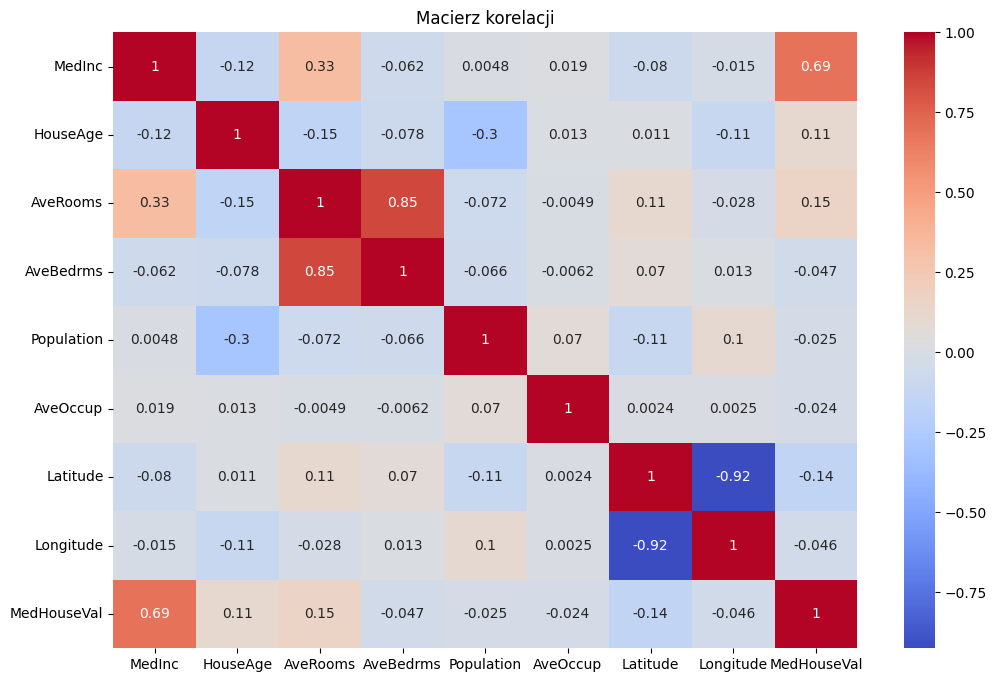

     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  2.344766  0.982143  0.628559  -0.153758   -0.974429 -0.049597  1.052548   
1  2.332238 -0.607019  0.327041  -0.263336    0.861439 -0.092512  1.043185   
2  1.782699  1.856182  1.155620  -0.049016   -0.820777 -0.025843  1.038503   
3  0.932968  1.856182  0.156966  -0.049833   -0.766028 -0.050329  1.038503   
4 -0.012881  1.856182  0.344711  -0.032906   -0.759847 -0.085616  1.038503   

   Longitude  MedHouseVal  
0  -1.327835        4.526  
1  -1.322844        3.585  
2  -1.332827        3.521  
3  -1.337818        3.413  
4  -1.337818        3.422  


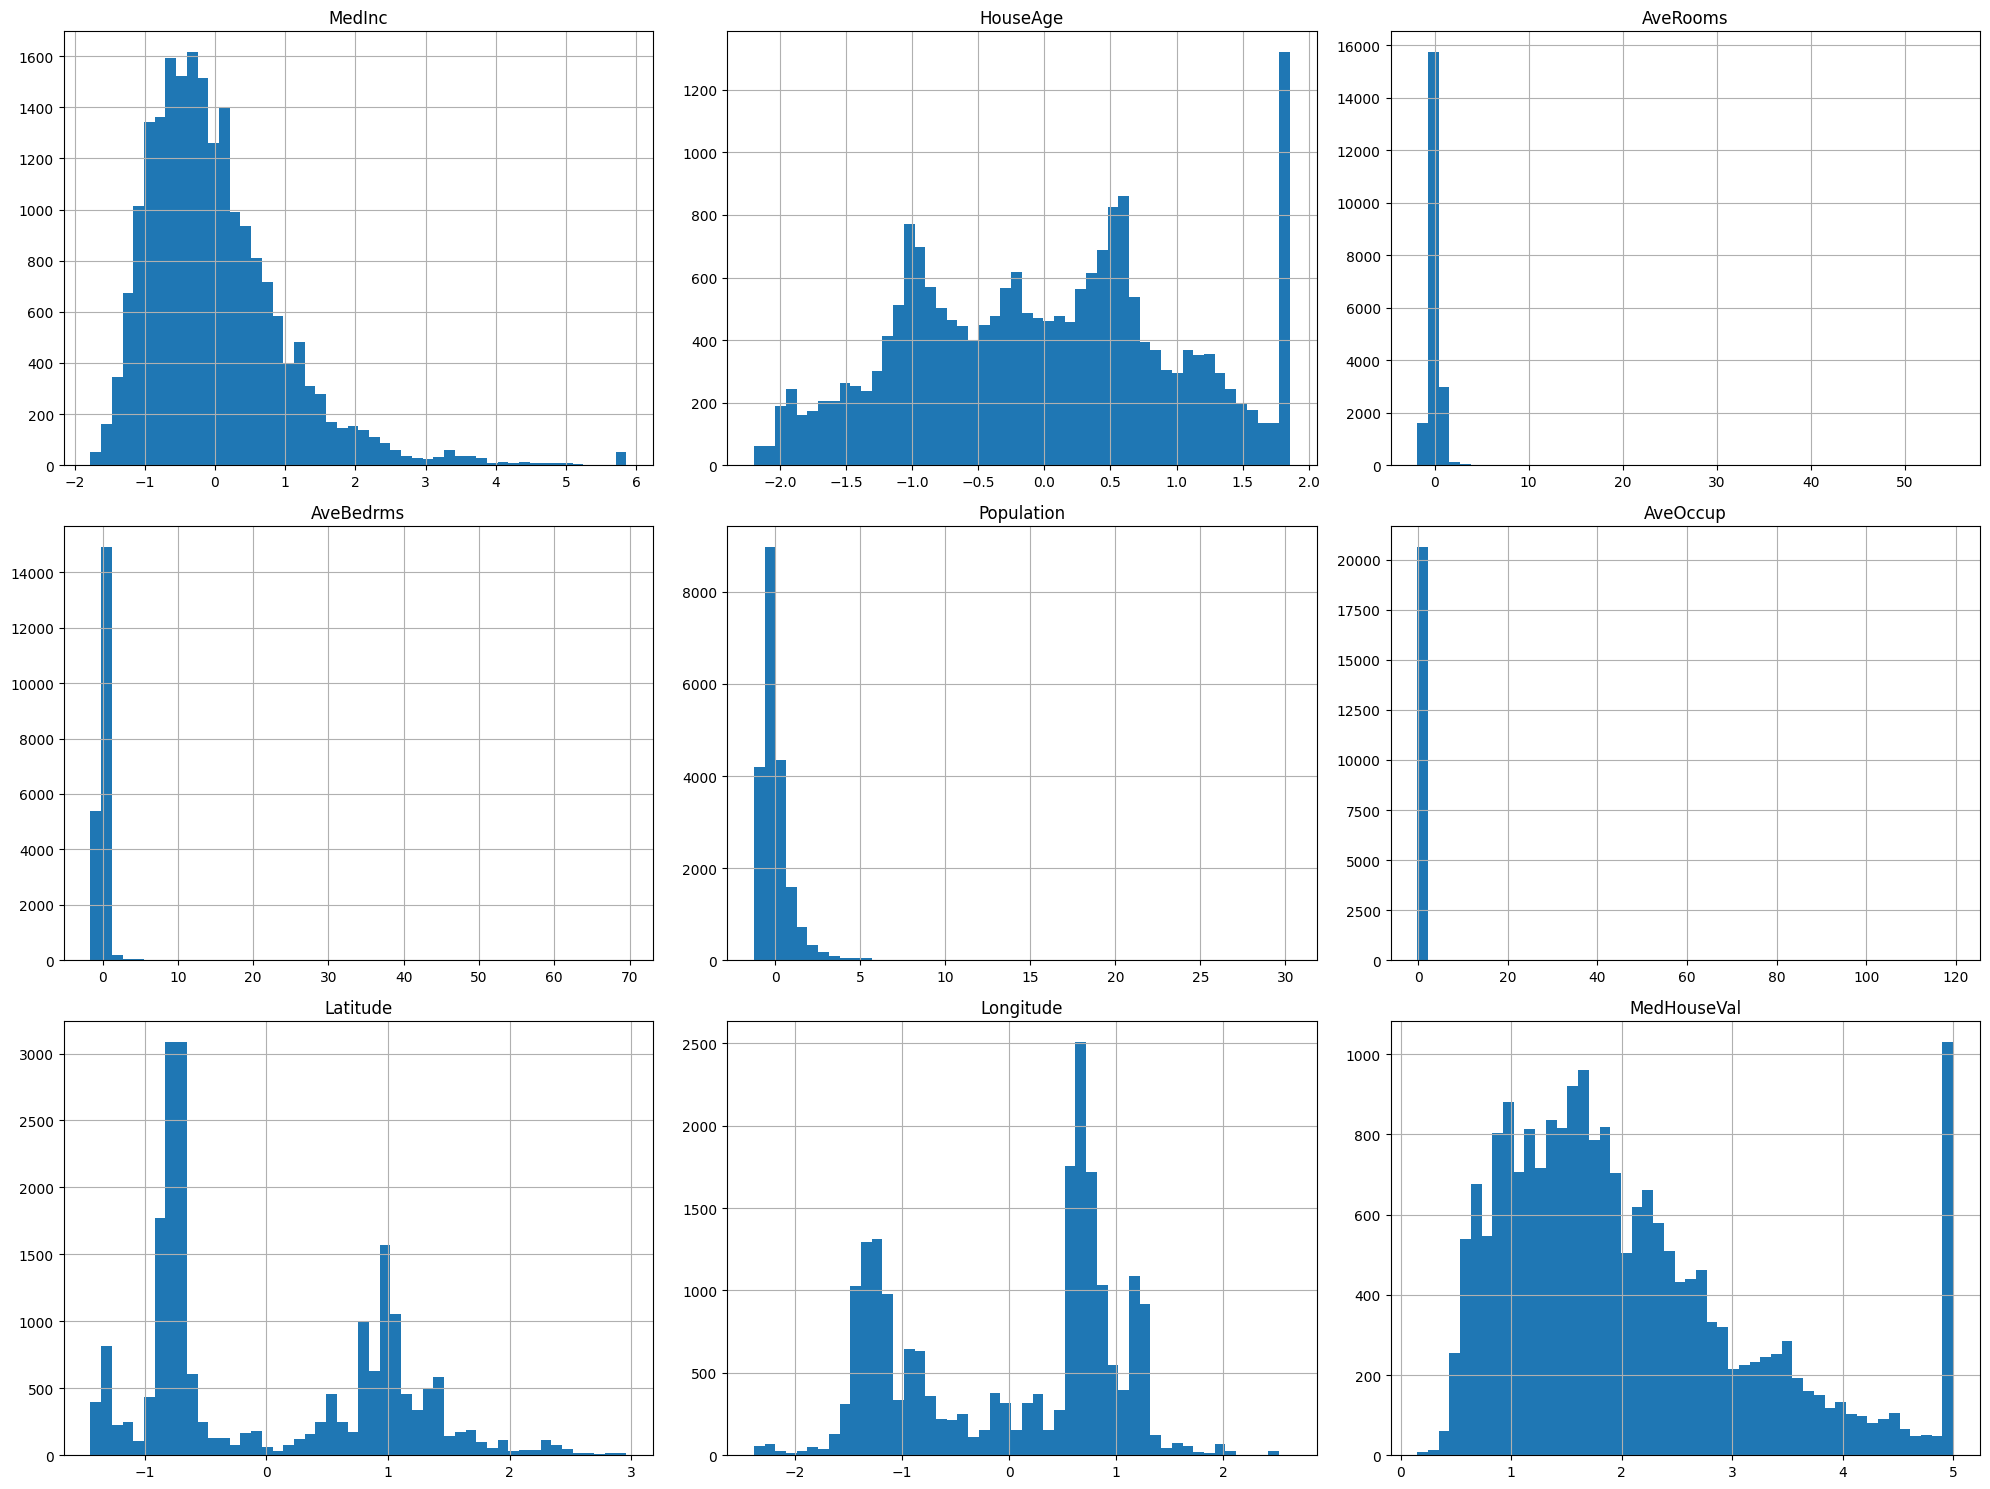

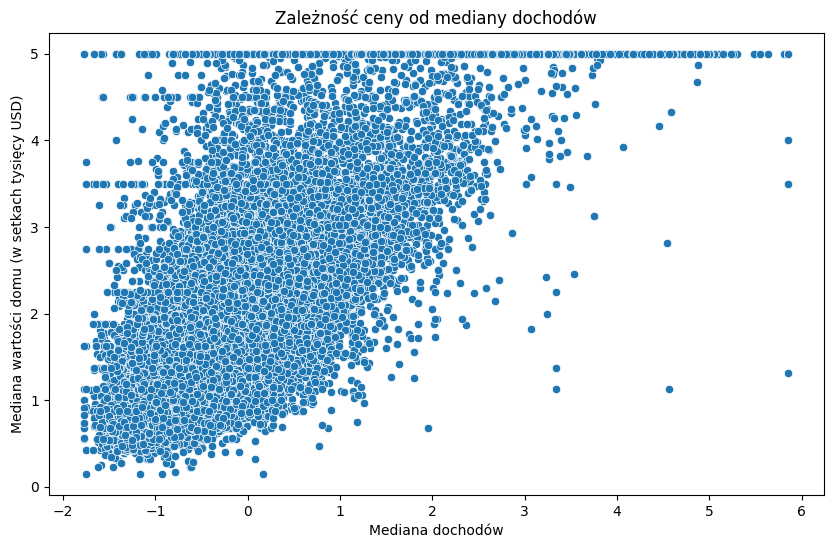

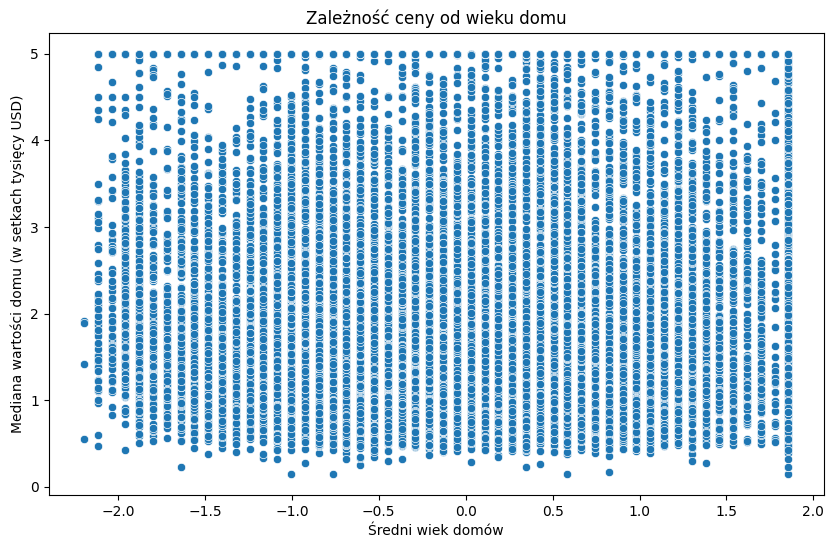

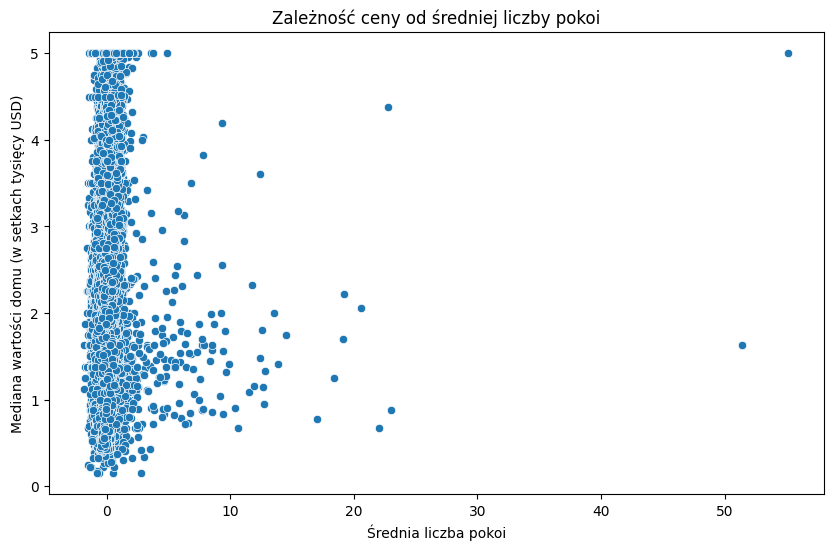

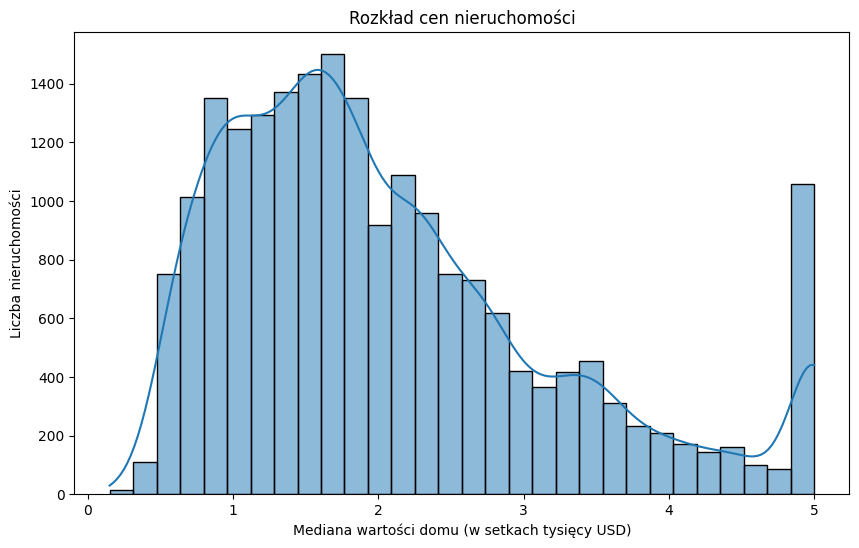

In [12]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Załadowanie danych
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['MedHouseVal'] = california.target

# Podgląd danych
print(df.head())
print(df.describe())

# Sprawdzenie brakujących wartości
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Analiza eksploracyjna
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Macierz korelacji')
plt.show()

# Standaryzacja danych (cechy niezależne)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('MedHouseVal', axis=1))

# Tworzenie nowej DataFrame z wystandaryzowanymi danymi
scaled_df = pd.DataFrame(scaled_features, columns=california.feature_names)
scaled_df['MedHouseVal'] = df['MedHouseVal']

# Podgląd wystandaryzowanych danych
print(scaled_df.head())

# Wizualizacja danych
scaled_df.hist(bins=50, figsize=(20, 15))
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='MedInc', y='MedHouseVal', data=scaled_df)
plt.title('Zależność ceny od mediany dochodów')
plt.xlabel('Mediana dochodów')
plt.ylabel('Mediana wartości domu (w setkach tysięcy USD)')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='HouseAge', y='MedHouseVal', data=scaled_df)
plt.title('Zależność ceny od wieku domu')
plt.xlabel('Średni wiek domów')
plt.ylabel('Mediana wartości domu (w setkach tysięcy USD)')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='AveRooms', y='MedHouseVal', data=scaled_df)
plt.title('Zależność ceny od średniej liczby pokoi')
plt.xlabel('Średnia liczba pokoi')
plt.ylabel('Mediana wartości domu (w setkach tysięcy USD)')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(scaled_df['MedHouseVal'], bins=30, kde=True)
plt.title('Rozkład cen nieruchomości')
plt.xlabel('Mediana wartości domu (w setkach tysięcy USD)')
plt.ylabel('Liczba nieruchomości')
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Podział danych na cechy (X) i zmienną docelową (y)
X = scaled_df.drop('MedHouseVal', axis=1)
y = scaled_df['MedHouseVal']

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Trenowanie modelu regresji liniowej
model = LinearRegression()
model.fit(X_train, y_train)

# Przewidywanie wartości na zbiorze testowym
y_pred = model.predict(X_test)

[3]
# Obliczanie MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Obliczanie RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Obliczanie MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Obliczanie R²
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 0.5558915986952441
Root Mean Squared Error (RMSE): 0.7455813830127762
Mean Absolute Error (MAE): 0.5332001304956565
R-squared (R²): 0.575787706032451


In [14]:
# Przeszukiwanie siatki dla Lasso
lasso_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso = Lasso()
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5)
lasso_grid.fit(X_train, y_train)

# Przeszukiwanie siatki dla grid
ridge = Ridge()
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)

# Przeszukiwanie siatki dla ElasticNet
elasticnet_params = {'alpha': [0.01, 0.1, 1, 10, 100], 'l1_ratio': [0.1, 0.5, 0.7, 0.9, 1.0]}
elasticnet = ElasticNet()
elasticnet_grid = GridSearchCV(elasticnet, elasticnet_params, cv=5, scoring='neg_mean_squared_error')
elasticnet_grid.fit(X_train, y_train)

def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}")
    
# Ocena najlepszego modelu Ridge
print("Ridge Regression:")
best_ridge = ridge_grid.best_estimator_
evaluate_model(best_ridge, X_train, y_train, X_test, y_test)

# Ocena najlepszego modelu Lasso
print("Lasso Regression:")
best_lasso = lasso_grid.best_estimator_
evaluate_model(best_lasso, X_train, y_train, X_test, y_test)

# Ocena najlepszego modelu ElasticNet
print("ElasticNet Regression:")
best_elasticnet = elasticnet_grid.best_estimator_
evaluate_model(best_elasticnet, X_train, y_train, X_test, y_test)


Ridge Regression:
MSE: 0.5559, RMSE: 0.7456, MAE: 0.5332, R²: 0.5758
Lasso Regression:
MSE: 0.5479, RMSE: 0.7402, MAE: 0.5355, R²: 0.5819
ElasticNet Regression:
MSE: 0.5515, RMSE: 0.7427, MAE: 0.5335, R²: 0.5791
